In [96]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [97]:
df = pd.read_csv('output/agent_log_44.csv')
n = len(df['type'].unique())
colors = plt.cm.viridis(np.linspace(0,1,n))

In [98]:
counts_per_type = []
for tp in sorted(df['type'].unique()):
    nums = []
    nums = [len(df[(df['tick']==i) & (df['type']==tp)]) for i in df['tick'].unique()]
    counts_per_type.append(nums)

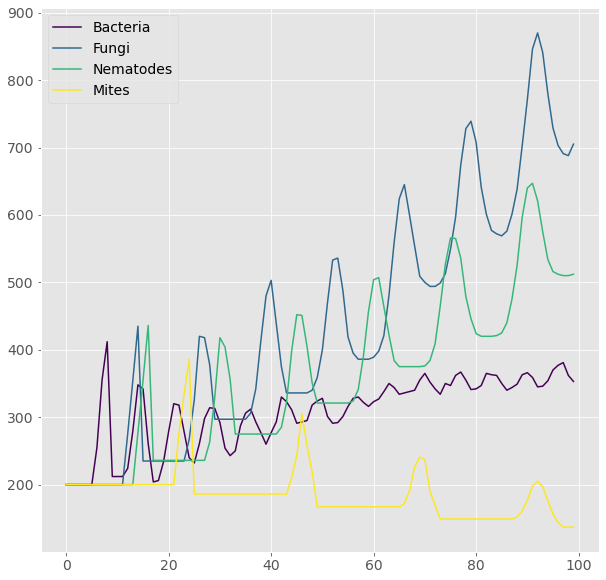

In [99]:
organism_group_labels=['Bacteria', 'Fungi', 'Nematodes', 'Mites']

plt.style.use('ggplot')
plt.figure(figsize=(10,10))

for i in range(len(counts_per_type)):

    plt.plot(range(100), counts_per_type[i], label=organism_group_labels[i], color=colors[i])

plt.legend()
plt.show()

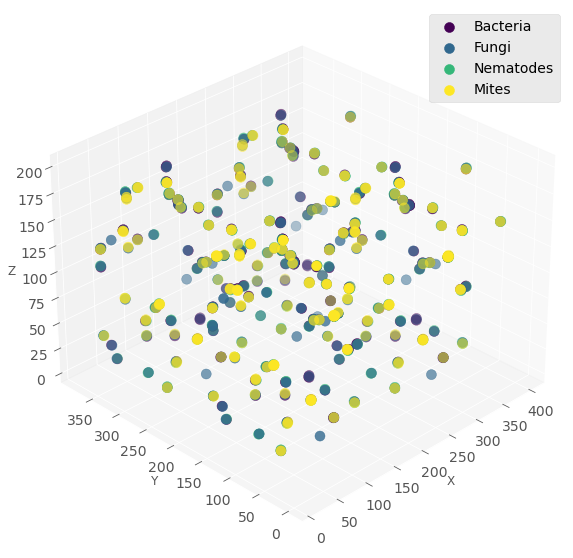

In [100]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.view_init(30, 225)

df1 = df[df['tick']==0]

for g in np.unique(df1['type']):
    ix = np.where(df1['type'] == g)
    ax.scatter(df1.iloc[ix]['x'], df1.iloc[ix]['y'], df1.iloc[ix]['z'], color=colors[g], label=organism_group_labels[g], s=100)

ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_facecolor('white')

plt.show()

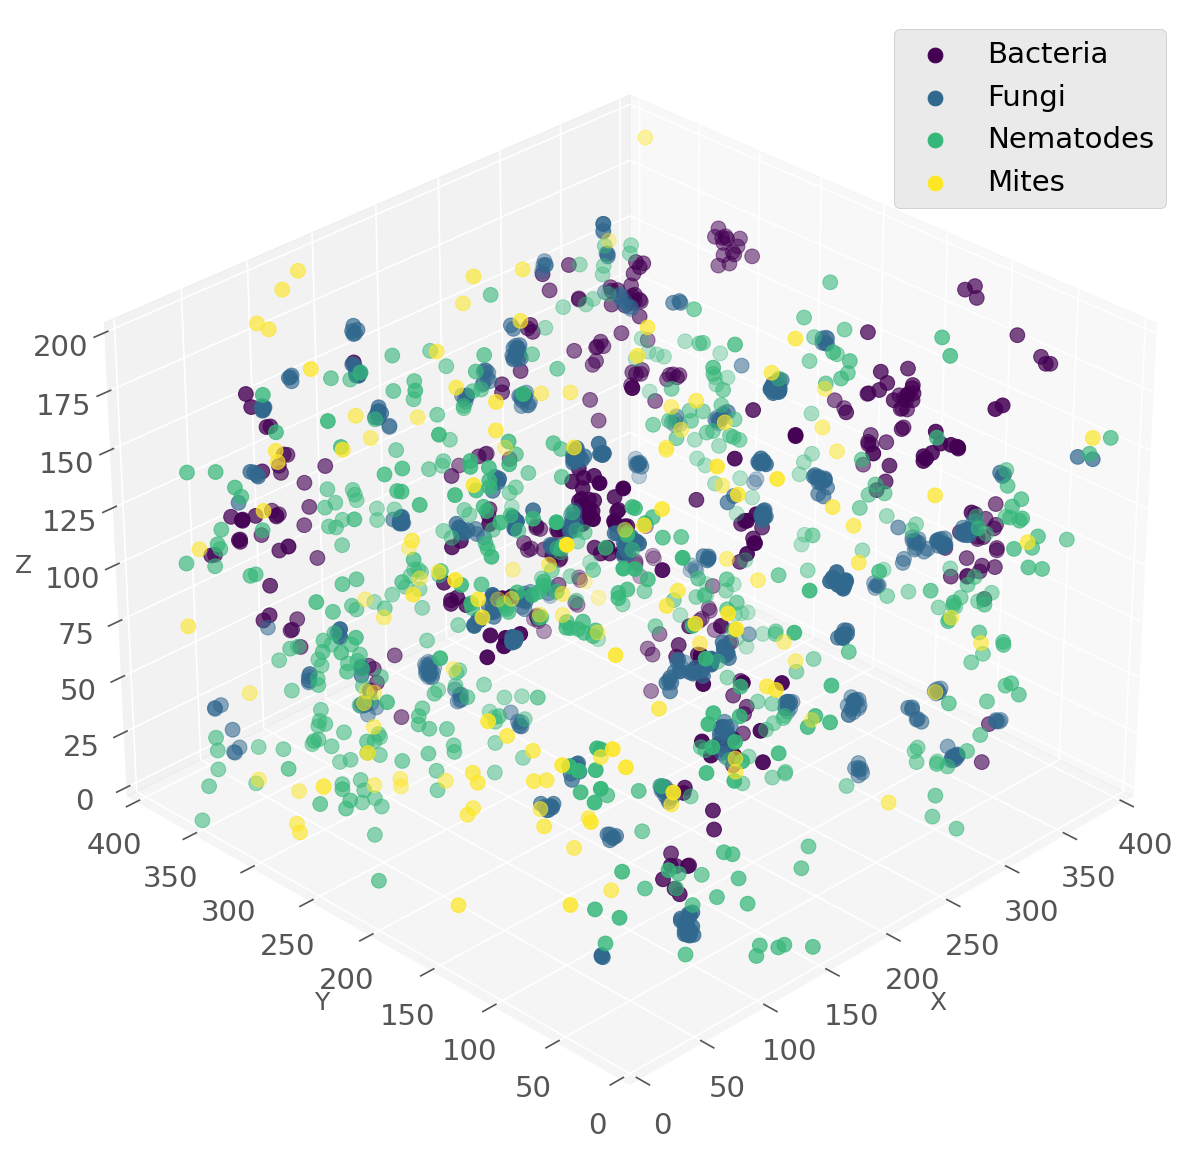

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def update(t):
    ax.cla()
    data=df[df['tick']==t]

    for g in np.unique(data['type']):
        ix = np.where(data['type'] == g)
        ax.scatter(data.iloc[ix]['x'], data.iloc[ix]['y'], data.iloc[ix]['z'], color=colors[g], label=organism_group_labels[g], s=50)

    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_zlim(0, 200)
    
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.style.use('ggplot')
fig = plt.figure(figsize=(10,10), dpi=150)
ax = fig.add_subplot(projection='3d')
ax.view_init(30, 225)
ax.set_facecolor('white')

ani = FuncAnimation(fig = fig, func = update, frames = 99, interval = 100)

ani.save('test.mp4')

plt.show()

In [ ]:
np.arange(5)

In [40]:
import networkx as nx

G= nx.Graph()

In [41]:
G.add_nodes_from([(0, {'organism': 'bacteria'}), (1, {'organism': 'fungi'}), (2, {'organism': 'nematode'}), (3, {'organism': 'mite'})])
G.add_edge(0, 1, weight=-0.5)
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 3, weight=0.3)
G.add_edge(2, 3, weight=0.4)
print(G.number_of_edges(), G.number_of_nodes())


4 4


In [42]:
import json
json.dumps(nx.node_link_data(G))

'{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"organism": "bacteria", "id": 0}, {"organism": "fungi", "id": 1}, {"organism": "nematode", "id": 2}, {"organism": "mite", "id": 3}], "links": [{"weight": -0.5, "source": 0, "target": 1}, {"weight": 0.5, "source": 1, "target": 2}, {"weight": 0.3, "source": 1, "target": 3}, {"weight": 0.4, "source": 2, "target": 3}]}'

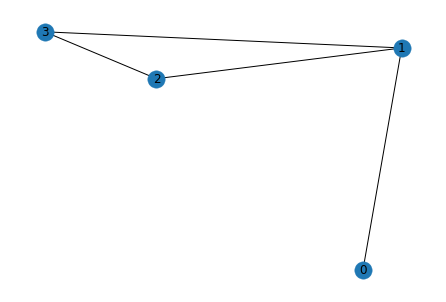

In [44]:
import matplotlib.pyplot as plt
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
nx.draw(G, with_labels=True)

In [18]:
G1= nx.node_link_graph(json.loads('{"directed": false, "multigraph": false, "graph": {}, "nodes": [{"organism": "bacteria", "id": 0}, {"organism": "fungi", "id": 1}, {"organism": "nematode", "id": 2}, {"organism": "mite", "id": 3}], "links": [{"weight": -0.5, "source": 0, "target": 1}, {"weight": 0.5, "source": 1, "target": 2}]}'))

In [19]:
st = sorted(G.degree, key=lambda x: x[1], reverse=True)

In [20]:
st[0][0]

1

In [21]:
st

[(1, 2), (0, 1), (2, 1), (3, 0)]

In [34]:
set(G[0])

{1}

In [64]:
[4 in G[p] for p in node_ids]

[False, False, False, False]

In [23]:
node_ids=[]
for i in [2, 1, 3, 4]:
    if(any([i in G[p] for p in node_ids])):
        print('yes')
        node_ids.append(i)
    else:
        node_ids.append(i)
        print('no')

no
yes
no
no
